# COVID-19 Italian Data Preliminary Analysis  

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(15, 12)})

In [2]:
data_dir = Path(".") / "data" 
national = data_dir / "dati-andamento-nazionale" / "dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(national, index_col=0,parse_dates=[0])

In [3]:
df.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
data,,,,,,,,,,,,,
2020-03-22 17:00:00,ITA,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402,NaN,NaN
2020-03-23 17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468,NaN,NaN
2020-03-24 17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964,NaN,NaN
2020-03-25 17:00:00,ITA,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445,NaN,NaN
2020-03-26 17:00:00,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,NaN,NaN


In [4]:
df = df.drop(columns=["stato", "note_it", "note_en"])
df.index.name='date'
df.index = df.index.to_period(freq='D')

In [5]:
df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-22,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
2020-03-23,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
2020-03-24,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964
2020-03-25,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445
2020-03-26,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060


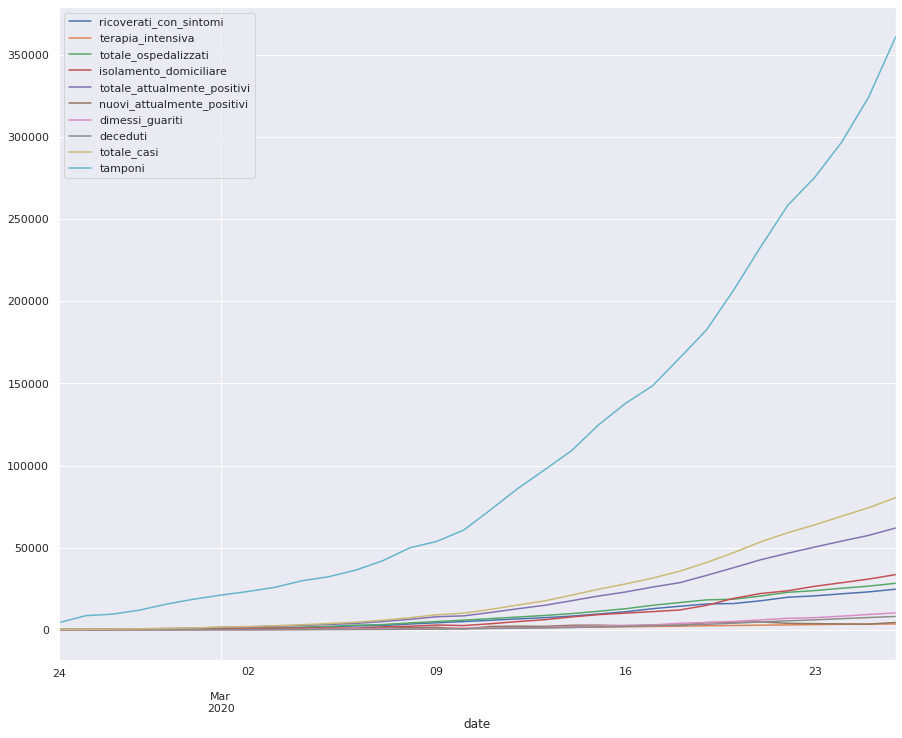

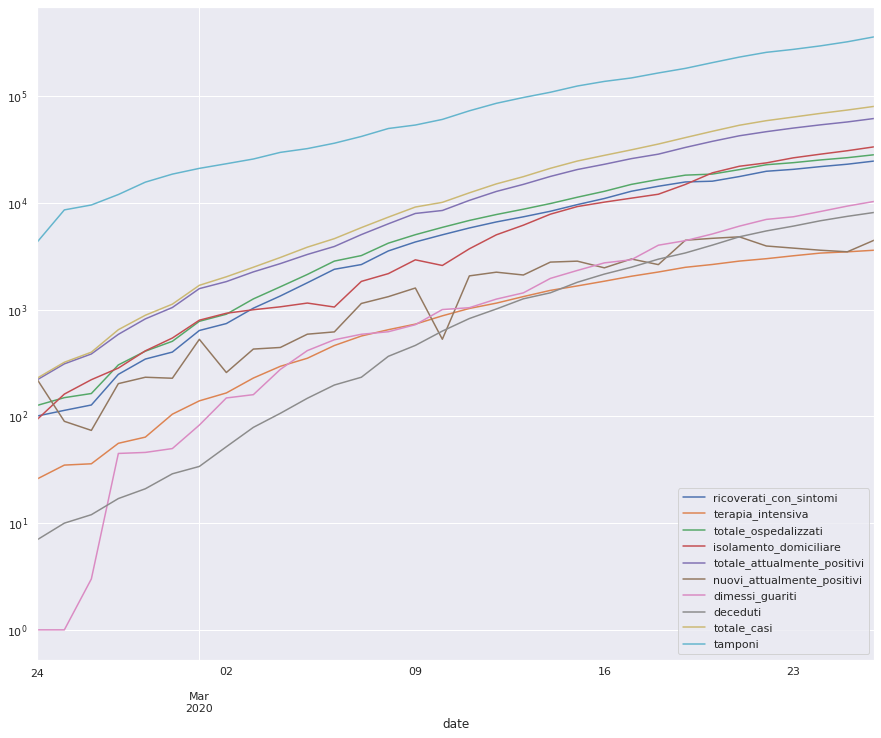

In [6]:
df.plot()
df.plot(logy=True);

In [7]:
deltadf = df.diff().dropna().astype(np.int)
percdf = df.pct_change().dropna()

In [8]:
deltadf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-22,2138,152,2290,1667,3957,-864,952,651,5560,25180
2020-03-23,846,195,1041,2739,3780,-177,408,601,4789,17066
2020-03-24,1245,192,1437,2175,3612,-168,894,743,5249,21496
2020-03-25,1175,93,1268,2223,3491,-121,1036,683,5210,27481
2020-03-26,1641,123,1764,2728,4492,1001,999,662,6153,36615


In [9]:
percdf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-22,0.120736,0.053203,0.111354,0.075375,0.092711,-0.179216,0.156785,0.134922,0.103774,0.107966
2020-03-23,0.042628,0.064806,0.045548,0.115166,0.081050,-0.044731,0.058087,0.109752,0.080980,0.066044
2020-03-24,0.060168,0.059925,0.060136,0.082007,0.071641,-0.044444,0.120291,0.122264,0.082109,0.078034
2020-03-25,0.053562,0.027385,0.050053,0.077465,0.064612,-0.033499,0.124429,0.100147,0.075315,0.092540
2020-03-26,0.071002,0.035254,0.066313,0.088228,0.078093,0.286737,0.106708,0.088231,0.082717,0.112854


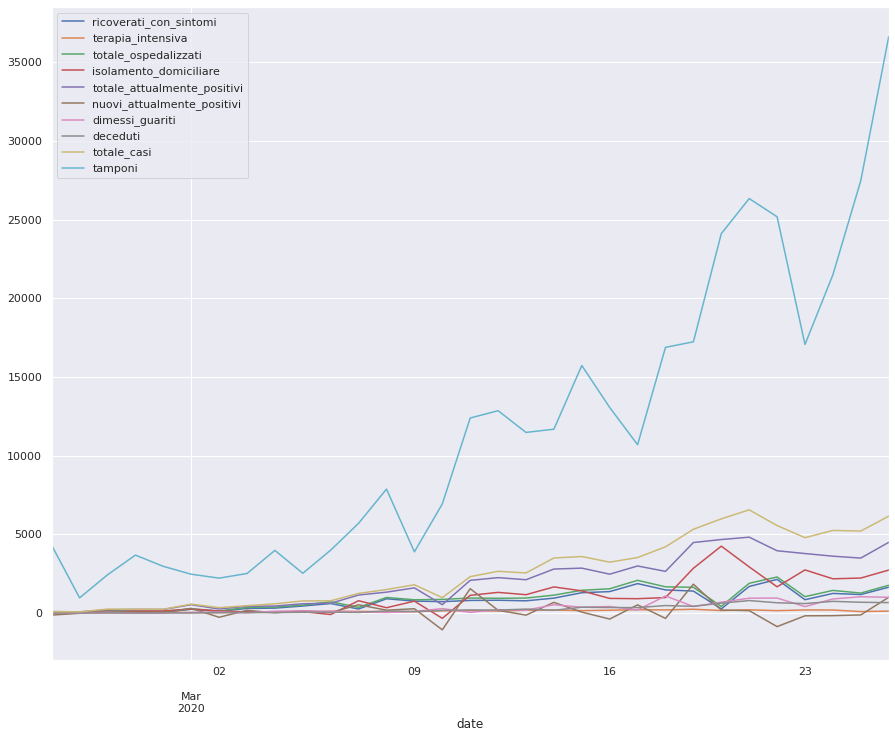

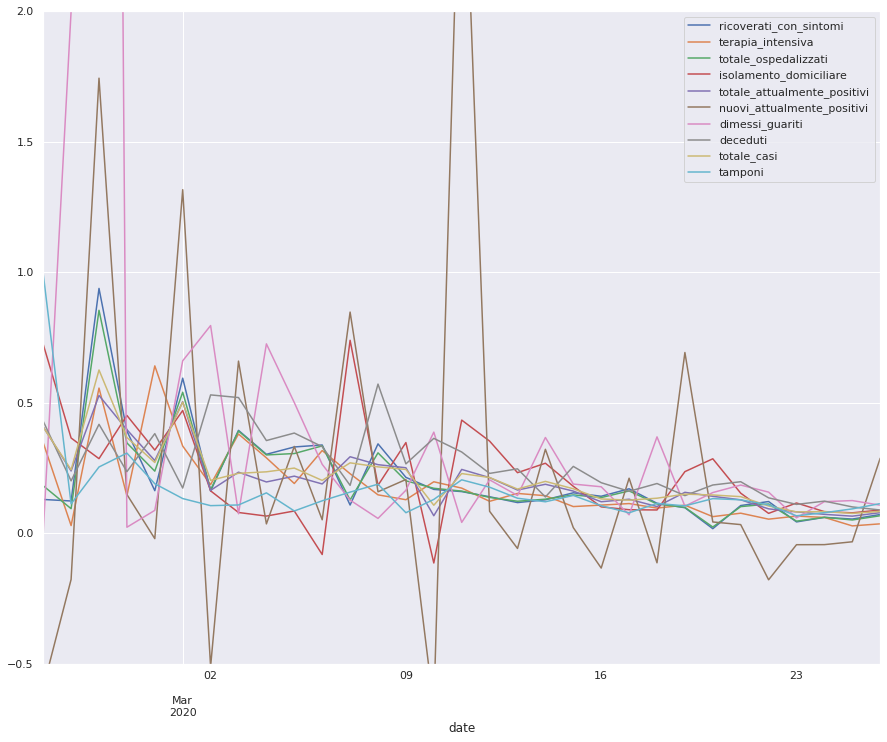

In [10]:
deltadf.plot()
percdf.plot(ylim=(-0.5, 2));

In [11]:
growthdf = pd.DataFrame({'total': df.totale_casi, 'diff1': df.totale_casi.diff(), 'diff2':df.totale_casi.diff().diff()})

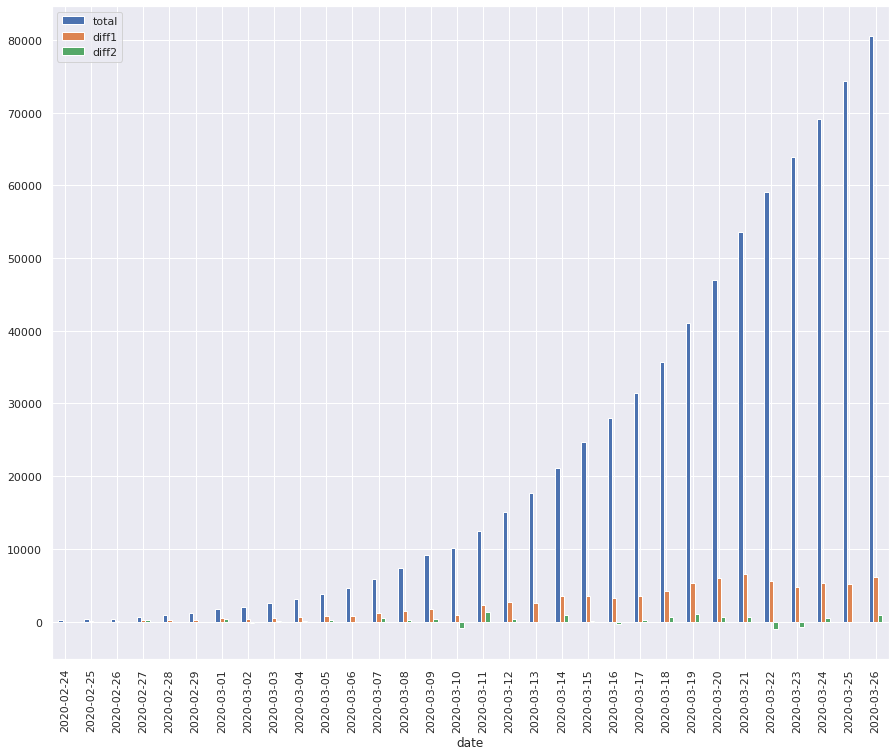

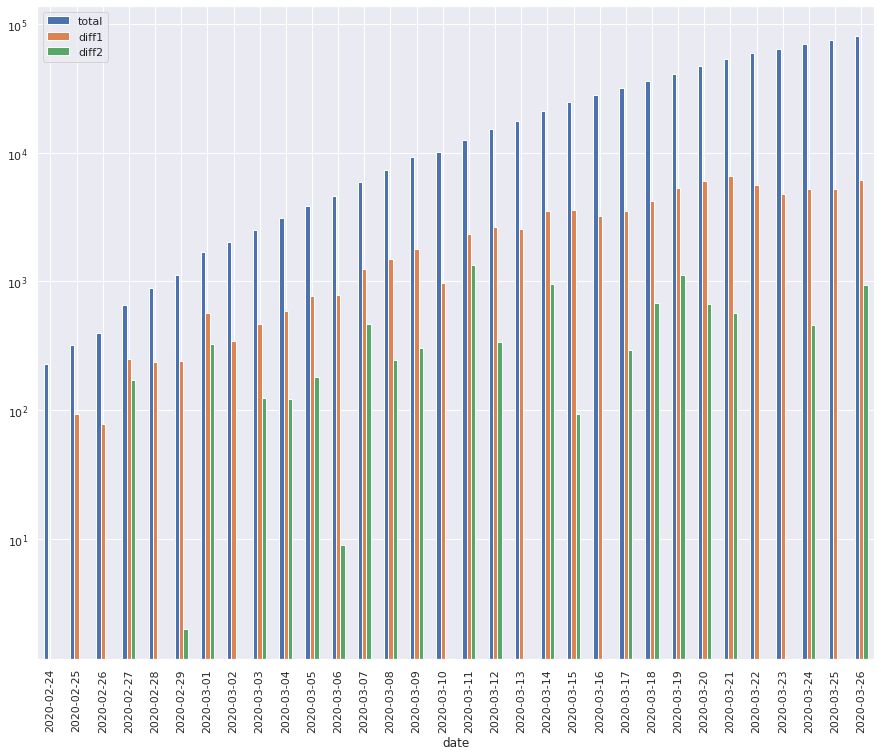

In [12]:
growthdf.plot(kind='bar')
growthdf.plot(kind='bar', logy=True);